# Prediksi Churn Nasabah Bank Beta Menggunakan Machine Learning

## Konten<a id='back'></a>

* [Pendahuluan](#intro)
* [Tahap 1. Inisialisasi data](#inisial)
* [Tahap 2. Mempersiapkan data data](#prepare)
* [Tahap 3. Persiapan model machine learning](#machineprep)
* [Tahap 4. Kualitas model](#quality)
* [Tahap 5. Pengujian terakhir](#finale)
* [Kesimpulan Umum](#conclusion)
    * [Temuan](#end)
    * [Rekomendasi](#recom)

## Pendahuluan<a id='intro'></a>

Nasabah Bank Beta pergi meninggalkan perusahaan: sedikit demi sedikit, jumlah mereka berkurang setiap bulannya. Para pegawai bank menyadari bahwa akan lebih menghemat biaya jika perusahaan fokus untuk mempertahankan nasabah lama mereka yang setia daripada menarik nasabah baru.

Pada kasus ini, tugas kita adalah untuk memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak. Kamu memiliki data terkait perilaku para klien di masa lalu dan riwayat pemutusan kontrak mereka dengan bank.

Buat sebuah model dengan skor F1 semaksimal mungkin. Untuk bisa dinyatakan lulus dari peninjauan, kamu memerlukan skor F1 minimal `0,59` untuk test dataset.

Setelah itu, kamu akan membuat perubahan yang diperlukan pada pekerjaanmu dan mengirimkannya kembali untuk tinjauan kedua.

Selain itu, ukur metrik `AUC-ROC` dan bandingkan metrik tersebut dengan skor F1.

Instruksi proyek
1. Unduh dan siapkan datanya. 
2. Periksa keseimbangan setiap kelas (class balance).  
3. Tingkatkan kualitas model. Pastikan bahwa kamu menggunakan setidaknya dua pendekatan untuk memperbaiki ketidakseimbangan kelas (imbalance class).
4. Gunakan training dan validation set untuk menemukan model terbaik serta kumpulan parameter terbaik. Jelaskan temuanmu secara singkat. 
5. Gunakan training set untuk memilih parameter terbaik. Tingkatkan kualitas model dengan memperhatikan ketidakseimbangan kelas (imbalance class) Latih beberapa model yang berbeda dan temukan yang terbaik.
6. Jalankan pengujian terakhir.

Deskripsi data
Data yang kamu butuhkan bisa ditemukan di file `/datasets/Churn.csv`.

Fitur-fitur
1. `RowNumber` — indeks string data
2. `CustomerId` — ID pelanggan
3. `Surname` — nama belakang
4. `CreditScore` — skor kredit
5. `Geography` — negara domisili
6. `Gender` — gender
7. `Age` — umur
8. `Tenure` — jangka waktu jatuh tempo untuk deposito tetap nasabah (tahun)
9. `Balance` — saldo rekening
10. `NumOfProducts` — jumlah produk bank yang digunakan oleh nasabah
11. `HasCrCard` — apakah nasabah memiliki kartu kredit (1 - jika ya; 0 - jika tidak)
12. `IsActiveMember` — tingkat keaktifan nasabah (1 - jika ya; 0 - jika tidak)
13. `EstimatedSalary` — estimasi gaji

Target
* `Exited` — apakah nasabah telah berhenti (1 - jika ya; 0 - jika tidak)

## Inisialisasi Data<a id='inisial'></a>

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, mean_squared_error, confusion_matrix, 
                             precision_score, recall_score, f1_score, 
                             classification_report, roc_curve, roc_auc_score, 
                             r2_score, mean_absolute_error, precision_recall_curve)
from sklearn.utils import resample, shuffle

# set tema seaborn
sns.set_theme(palette='bright')


## Mempersiapkan Data<a id='prepare'></a>

In [78]:
# Mengunduh dan memeriksa data
beta = pd.read_csv('/datasets/Churn.csv')
beta.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [79]:
#informasi umum
beta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [80]:
# mengecek nilai yang hilang pada dataset
beta.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [81]:
# mengecek duplikasi pada dataset
beta.duplicated().sum()

0

**Kesimpulan Sementara:**
1. terlihat bahwa data berisi 14 kolom, dengan jumlah data 10000
2. kolom memiliki judul yang besar kecil sehingga harus diperbaiki
3. terlihat bahwa ada nilai hilang pada kolom `Tenure`
4. kolom `Tenure` memiliki tipe data yang salah
5. tidak ada data yang terduplikasi

In [82]:
#mengubah kolom menjadi kecil semua
beta.columns = beta.columns.str.lower()

#menampilkan data baru
beta

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


sekarang judul kolom sudah menjadi kecil semua

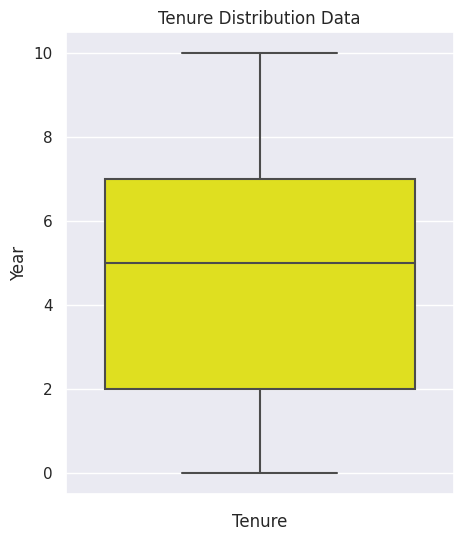

In [83]:
# mengecek distribusi kolom 'Tenure' dengan boxplot
plt.figure(figsize=(5,6))
sns.boxplot(data=beta, y='tenure', color='yellow')

# menambahkan atribut pada grafik
plt.title('Tenure Distribution Data')
plt.ylabel('Year')
plt.xlabel('Tenure')

# menampilkan grafik
plt.show()

Bisa dilihiat bahwa data pada kolom ini tidak memilki outliers, sehingga bisa kita isi dengan menggunakan nilai `mean`.

In [84]:
# rata-rata tenure
mean_tenure = round(beta['tenure'].mean())

# mengisi nilai yang hilang pada kolom 'Tenure'
beta['tenure'].fillna(mean_tenure, inplace=True)

# mengecek nilai yang hilang pada kolom 'Tenure'
beta['tenure'].isna().sum()

0

In [85]:
#Mengubah tipe data pada kolom tenure
beta['tenure'] = beta['tenure'].astype('int64')

#memeriksa informasi umum
beta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [86]:
#informasi umum tambahan
beta.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


sekarang dataset sudah memiliki informasi yang lengkap.

## Persiapan Model Machine Learning<a id='machineprep'></a>

### Membuat One Hot Encoding (OHE)

Pada dataset terdapat fitur/kolom yang berisi kelas kategorik seperti pada kolom `Geography` dan `Gender`. Kita cek apakah kolom tersebut cocok untuk diterapkan One Hot Encoding (OHE).

In [87]:
# mengecek data kategorik
# menampilkan kolom geografi
print('Geography')
print(beta['geography'].value_counts())

# menampilkan kolom jenis kelamin
print('\nGender')
print(beta['gender'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

Gender
Male      5457
Female    4543
Name: gender, dtype: int64


In [88]:
#menampilkan sample data
beta.head(10)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [89]:
#Mengencode kolom data yang kategorik
# Untuk kolom gender
beta['gender'] = pd.get_dummies(beta['gender'], drop_first=True)

# Untuk kolom Geography
beta['geography'] = pd.get_dummies(beta['geography'], drop_first=True)

#menampilkan sample data
beta.head(10)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,0,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,0,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,0,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,0,1,27,2,134603.88,1,1,1,71725.73,0


sekarang kita sudah mengubah nilainya:
1. kolom `gender` berisikan data `female` diganti menjadi `0` dan `male` menjadi `1`
2. kolom `geography` berisikan data `france` dan `spain` diganti menjadi `0` dan `germany` menjadi `1`

### Memisahkan fitur dari target dataset

In [90]:
# memisahkan fitur dan target dari dataset
#fitur kecuali data kolom `exited` dan `surname`
features = beta.drop(['exited', 'surname'],axis=1)
#target hanya data kolom `exited`
target = beta['exited']

print('Features -->', features.shape)
print('Target -->', target.shape)

Features --> (10000, 12)
Target --> (10000,)


In [91]:
# Membagi data menjadi training set dan testing set
features_train_full, features_test, target_train_full, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Membagi training set menjadi training set dan validation set
features_train, features_valid, target_train, target_valid = train_test_split(features_train_full, target_train_full, test_size=0.25, random_state=42)

print('Training set:', features_train.shape, target_train.shape)
print('Validation set:', features_valid.shape, target_valid.shape)
print('Testing set:', features_test.shape, target_test.shape)

Training set: (6000, 12) (6000,)
Validation set: (2000, 12) (2000,)
Testing set: (2000, 12) (2000,)


sekarang data sudah terbagi menjadi `training set`, `validation set` dan `testing set` dengan perbandingan `60:20:20`

### Memeriksa kesetimbangan

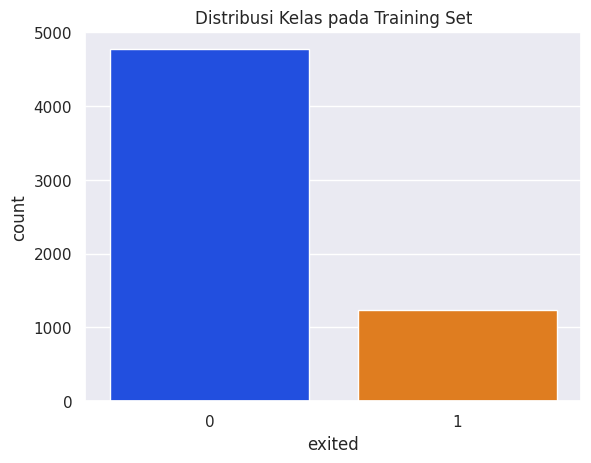

0    0.794833
1    0.205167
Name: exited, dtype: float64


In [92]:
# Pemeriksaan keseimbangan kelas
sns.countplot(x=target_train)
plt.title('Distribusi Kelas pada Training Set')
plt.show()

# Rasio kelas
ratio = target_train.value_counts(normalize=True)
print(ratio)


terlihat bahwa data sangat tidak setimbang antara `0` dan `1`

### Menskalasi fitur

kita akan melihat kolom-kolom yang berisi nilai numeric. Beberapa fitur numerik yang besar seperti pada `creditscore`, `age`, `balance`, dan `estimatedsalary`, namun untuk `tenure` dan `numofproducts` kita akan meninjaunya.

In [93]:
# nilai unik pada kolom 'Tenure' dan 'NumOfProducts'
print('Tenure:',features['tenure'].unique())
print('NumOfProducts: ',features['numofproducts'].unique())

Tenure: [ 2  1  8  7  4  6  3 10  5  9  0]
NumOfProducts:  [1 3 2 4]


terlihat bahwa skalanya sudah jelas dan tidak terlalu jauh `tenure` berisikan data dengan skala `0-10` sedangkan `numofproducts` berisikan skala `1-4`

selanjutnya kita lakukan scaling untuk fitur `creditscore`, `age`, `balance` dan `estimatedsalary`.

In [94]:
# menskalakan fitur menggunakan 'StandardScaler'
numeric = ['creditscore','age','balance','estimatedsalary']
features[numeric] = StandardScaler().fit_transform(features[numeric])

# menampilkan sampel fitur
features.head()

,rownumber,customerid,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,1,15634602,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886
1,2,15647311,-0.440036,0,0,0.198164,1,0.117350,1,0,1,0.216534
2,3,15619304,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687
3,4,15701354,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918
4,5,15737888,2.063884,0,0,0.388871,2,0.785728,1,1,1,-0.365276


sekarang kita sudah melakukan scaling untuk fitur `creditscore`, `age`, `balance` dan `estimatedsalary`.

## Meningkatkan kualitas model<a id='quality'></a>

Untuk meningkatkan kualitas model, upsampling atau downsampling bisa dilakukan untuk menyeimbangkan dataset dengan meningkatkan atau menurunkan ukuran sampel. sebelum itu perlu dicoba berbagai pemodelan machine learning, sehingga didapatkan dataset baru yang seimbang dapat diambil untuk pemodelan lebih lanjut.

### Model Decision Tree

In [95]:
# pecobaan algoritma decision tree

# membuat temporary variabel
f1_best = 0
AUC_ROC_best = 0
depth_best = 0

# pengujian kedalaman model decision tree (depth -> 1 ~ 50)
for depth in range(1, 51):
	# membuat model decision tree
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
	# melatih model menggunakan features dan target train
	model.fit(features_train, target_train)
	# prediksi model
	predict = model.predict(features_valid)
	predict_proba = model.predict_proba(features_valid)
	predict_one_valid = predict_proba[:,1]
	# menghitung F1 dan AUC_ROC menggunakan features dan target validation
	f1 = f1_score(target_valid,predict)
	AUC_ROC = roc_auc_score(target_valid,predict_one_valid)

	if f1 > f1_best and AUC_ROC > AUC_ROC_best:
		f1_best = f1
		AUC_ROC_best = AUC_ROC
		depth_best = depth

# menampilkan output        
print("Model Terbaik (Decision Tree)")
print('Depth -->', depth_best)
print('F1 Score -->', f1_best)
print('AUC_ROC -->', AUC_ROC_best)

Model Terbaik (Decision Tree)
Depth --> 5
F1 Score --> 0.5722801788375559
AUC_ROC --> 0.8317656625945372


Berdasarkan hasil yang didapatkan:
* Depth --> 5: Kedalaman terbaik dari Decision Tree adalah 5.
* F1 Score --> 0.5722801788375559: Kombinasi presisi dan recall dari model cukup baik, tetapi tidak sangat tinggi.
* AUC-ROC --> 0.8317656625945372: Model memiliki performa yang baik dalam memisahkan kelas positif dan negatif.

### Model Random Forest

In [96]:
# pecobaan algoritma random forest
# kedalaman pohon: depth -> 1 ~ 20
# jumlah pohon: n_estimators -> 1 ~ 60 {increment 10}

# membuat temporary
f1_best = 0
AUC_ROC_best = 0
depth_best = 0
estimators_best = 0

# pengujian kedalaman model dan jumlah pohon
# pengaturan jumlah pohon
for est in range(1, 61, 10):
    # pengaturan jumlah kedalaman pohon
    for depth in range (1, 21):
        # membuat model random forest classifier
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        # melatih model menggunakan features dan target train
        model.fit(features_train, target_train)
        predict = model.predict(features_valid)
        predict_proba = model.predict_proba(features_valid)
        predict_one_valid = predict_proba[:,1]
        # menghitung F1 dan AUC_ROC menggunakan features dan target validation
        f1 = f1_score(target_valid,predict)
        AUC_ROC = roc_auc_score(target_valid,predict_one_valid)

        if f1 > f1_best and AUC_ROC > AUC_ROC_best:
            f1_best = f1
            AUC_ROC_best = AUC_ROC
            depth_best = depth
            estimators_best = est

# menampilkan output        
print("Model Terbaik (Random Forest)")
print('Depth -->', depth_best)
print('Trees -->', estimators_best)
print('F1 Score -->', f1_best)
print('AUC_ROC -->', AUC_ROC_best)

Model Terbaik (Random Forest)
Depth --> 10
Trees --> 41
F1 Score --> 0.5878693623639192
AUC_ROC --> 0.8629985459949253


Berdasarkan hasil yang didapatkan:
* Depth --> 10: Kedalaman terbaik dari model adalah 10.
* Trees --> 41: Jumlah pohon yang paling baik adalah 41
* F1 Score --> 0.5878693623639192: Kombinasi presisi dan recall dari model cukup baik, tetapi tidak sangat tinggi.
* AUC-ROC --> 0.8629985459949253: Model memiliki performa yang baik dalam memisahkan kelas positif dan negatif.

### Model regresi logistik

In [97]:
# pecobaan algoritma regresi logistik

# membuat model regresi logistik
model = LogisticRegression(random_state=12345, solver='liblinear') 

# melatih model menggunakan features dan target train
model.fit(features_train, target_train)

# menghitung akurasi menggunakan features dan target validation
predict = model.predict(features_valid)
predict_proba = model.predict_proba(features_valid)
predict_one_valid = predict_proba[:,1]

# menghitung F1 Skor dan AUC_ROC
f1 = f1_score(target_valid,predict)
AUC_ROC = roc_auc_score(target_valid,predict_one_valid)

# menampilkan output        
print("Model Regresi Logistik")
print('F1 Score -->', f1)
print('AUC_ROC -->', AUC_ROC)

Model Regresi Logistik
F1 Score --> 0.0
AUC_ROC --> 0.5826166293629688


Berdasarkan hasil yang didapatkan:
* F1 Score --> 0.0: Kombinasi presisi dan recall dari model tidak baik, sehingga tidak dianjurkan untuk melanjutkan dengan model ini.
* AUC-ROC --> 0.5826166293629688: Model memiliki performa yang cukup baik dalam memisahkan kelas positif dan negatif.

darisini diputuskan untuk menggunakan model `random forest` dengan `f1 score` `0.587` dan `AUC_ROC` `0.862`.

### Mengatasi Kelas yang Tidak Seimbang (Imbalance)

Metode yang akan kita gunakan untuk menyeimbangkan dataset yaitu teknik upsampling, downsampling pada dataset dan juga mengaktifkan `class_weight = 'balanced'` pada model.

Kelas 0 memiliki jumlah yang jauh lebih banyak dibandingkan dengan Kelas 1, sehingga kita akan menggandakan Kelas 1 dan mereduksi Kelas 0. Mari kita buat fungsinya.

In [98]:
# melakukan upsampling dan downsampling pada dataset

def up_down(feature,target,repeat,fraction):
    features_zero = feature[target == 0]
    feature_one = feature[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]

    # downsampling dataset
    down_1 = features_zero.sample(frac=fraction,random_state=12345)
    down_2 = target_zero.sample(frac=fraction,random_state=12345)

    # upsampling dataset
    temp_1 = pd.concat([down_1] + [feature_one]*repeat)
    temp_2 = pd.concat([down_2] + [target_one]*repeat)

    # mengacak data
    features_new, target_new = shuffle(temp_1, temp_2, random_state=12345)

    return features_new, target_new

Selanjutnya mari kita buat fitur dan target yang baru. Agar seimbang mari kita gandakan Kelas 1 sebanyak 2x dan kita reduksi 50% pada Kelas 0.

In [99]:
# menerapkan ke dalam fungsi yang sudah dibuat repeat=2, fraksi=50%
features_updown, target_updown = up_down(features_train, target_train, 2, 0.5)

# cek kembali keseimbangan dataset pada target
target_updown.value_counts(normalize=True)

1    0.508048
0    0.491952
Name: exited, dtype: float64

Sudah terlihat bahwa Kelas 1 dan Kelas 0 yang baru hampir mendekati seimbang (balance).

## Pengujian terakhir<a id='finale'></a>

In [100]:
# membuat model random forest dengan balancing weight 
# n_estimators = 41
# depth = 10

model = RandomForestClassifier(
    random_state = 12345, 
    n_estimators = 41, 
    max_depth = 10,
    class_weight = 'balanced'
    )

# melatih model menggunakan dataset yang baru
model.fit(features_updown, target_updown)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=41,
                       random_state=12345)

In [101]:
# Melakukan prediksi pada validation set
predict_valid = model.predict(features_valid)
predict_proba_valid = model.predict_proba(features_valid)
predict_one_valid = predict_proba_valid[:, 1]

# Menghitung metrik evaluasi
f1 = f1_score(target_valid, predict_valid)
AUC_ROC = roc_auc_score(target_valid, predict_one_valid)
precision = precision_score(target_valid, predict_valid)
recall = recall_score(target_valid, predict_valid)

# Menampilkan output
print("Model dengan Upsampling dan Downsampling (Random Forest)")
print('F1 Score -->', f1)
print('AUC_ROC -->', AUC_ROC)
print('Precision -->', precision)
print('Recall -->', recall)


Model dengan Upsampling dan Downsampling (Random Forest)
F1 Score --> 0.6169772256728779
AUC_ROC --> 0.8640421341071752
Precision --> 0.538878842676311
Recall --> 0.7215496368038741


* Keseimbangan antara Precision dan Recall: Dengan F1 Score yang cukup baik (0.617) dan nilai recall yang tinggi (0.722), model ini lebih cenderung menangkap nasabah yang akan meninggalkan bank meskipun dengan mengorbankan sedikit precision (banyak false positives). dan telah memenuhi minimal 0.59 untuk nilai F1
* Kemampuan Diskriminasi: Nilai AUC-ROC yang tinggi (0.864) menunjukkan bahwa model ini secara umum sangat baik dalam membedakan antara kelas positif dan negatif.

## Kesimpulan<a id='conclusion'></a>

1. model `decision tree` mendapatkan nilai `F1 Score` cukup baik yaitu `0.572` dan nilai `AUC_ROC` juga cukup tinggi yaitu `0.831`
2. model `random forest` mendapatkan nilai `F1 Score` cukup baik yaitu `0.587` dan nilai `AUC_ROC` juga cukup tinggi yaitu `0.862`. nilai ini lebih tinggi dibandingkan dengan model `decision tree`
3. model `regresi logistik` mendapatkan nilai `F1 Score` yang tidak baik yaitu `0.0` dan nilai `AUC_ROC` rendahi yaitu `0.582`. sehingga model ini sangat tidak dianjurkan untuk dilanjutkan
4. model `random forest` yang sudah di upsampling dan di downsampling dengan `n_estimators` : `41` dan kedalaman `10` dihasilkan nilai `F1 Score` yang baik yaitu `0.616` ini memenuhi syarat inimal nilai `f1` `0.59` dan nilai `AUC_ROC` juga lebih tinggi yaitu `0.864`. serta dibuktikan dengan nilai `precision` `0.538` dan `recall` `0.721`

### Temuan<a id='end'></a>

1. kolom masih berisikan dengan judul dengan huruf besar kecil sehingga harus diubah menjadi kecil semua
2. kolom `tenure` berisikan tipe data yang salah dan banyak nilai hilang
3. kolom `tenure` diisi dengan nilai rata-rata karena tidak memiliki outlier
4. kolom yang berisi data kategorik bisa diselesaikan menggunakan OHE
5. data pada kolom `exited` tidak seimbang sehingga diperlukan penanganan lanjutan
6. perlu dilakukan skalasi fitur untuk kolom numeric `creditscore`, `age`, `balance`, dan `estimatedsalary` akan tetapi kolom `tenure` dan `numofproducts` tidak perlu diskalasi karena rentangnya tidak terlalu jauh
7. untuk mengatasi ketidak seimbangan digunakan upsampling dan downsampling pada dataset dengan cara gandakan Kelas 1 sebanyak 2x dan reduksi 50% pada Kelas 0.


### Rekomendasi<a id='recom'></a>

1. Menggunakan Model Random Forest yang Sudah Di-upsampling dan Downsampling: Model ini memberikan keseimbangan yang baik antara precision dan recall, serta memiliki performa yang lebih baik dibandingkan model lainnya berdasarkan metrik evaluasi yang telah dihitung.
2. Tuning Hyperparameters Lebih Lanjut: Untuk lebih meningkatkan performa, pertimbangkan untuk melakukan tuning hyperparameters lebih lanjut. Misalnya, coba berbagai nilai untuk n_estimators, max_depth, dan parameter lainnya menggunakan grid search atau random search.
3. Cross-Validation: Lakukan cross-validation untuk memastikan bahwa hasil yang diperoleh konsisten dan model tidak overfitting pada validation set.
4. Analisis Confusion Matrix: Gunakan confusion matrix untuk memahami lebih dalam tentang distribusi prediksi model (true positives, false positives, true negatives, false negatives) dan untuk mengidentifikasi area perbaikan lebih lanjut.
5. Monitoring dan Pembaruan Berkala: Setelah model di-deploy, lakukan monitoring berkala terhadap performa model dan lakukan pembaruan data serta retraining model secara periodik untuk memastikan model tetap up-to-date dan relevan dengan perubahan pola data.

Dengan rekomendasi ini, diharapkan model yang diterapkan dapat membantu bank mempertahankan nasabah dengan lebih baik, sekaligus memberikan informasi yang lebih akurat mengenai nasabah yang kemungkinan besar akan meninggalkan bank.

Model Random Forest yang Sudah Di-upsampling dan Downsampling, model ini siap digunakan untuk memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak, membantu bank untuk mempertahankan nasabah lama mereka yang setia.

[Kembali](#back)